In [3]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt 
file=pd.ExcelFile("sales.xls")
df1=file.parse('Orders')
df2=file.parse('Returns')
df3=file.parse('People')




In [1]:
product=input('Enter product name :')

Enter product name :Chairs


In [4]:
file = pd.ExcelFile("sales.xls")
churndf=file.parse("Orders")
fdf=file.parse("Returns")
churndf[~churndf.isin(fdf)].dropna()
churn_df=churndf.loc[churndf["Sub-Category"]==product]
churn_df

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,...,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
1,2,CA-2016-152156,2016-11-08,2016-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.940,3,0.0,219.5820
23,24,US-2017-156909,2017-07-16,2017-07-18,Second Class,SF-20065,Sandra Flanagan,Consumer,United States,Philadelphia,...,19140,East,FUR-CH-10002774,Furniture,Chairs,"Global Deluxe Stacking Chair, Gray",71.372,2,0.3,-1.0196
39,40,CA-2015-117415,2015-12-27,2015-12-31,Standard Class,SN-20710,Steve Nguyen,Home Office,United States,Houston,...,77041,Central,FUR-CH-10004218,Furniture,Chairs,"Global Fabric Manager's Chair, Dark Gray",212.058,3,0.3,-15.1470
52,53,CA-2015-115742,2015-04-18,2015-04-22,Standard Class,DP-13000,Darren Powers,Consumer,United States,New Albany,...,47150,Central,FUR-CH-10003061,Furniture,Chairs,"Global Leather Task Chair, Black",89.990,1,0.0,17.0981
57,58,CA-2016-111682,2016-06-17,2016-06-18,First Class,TB-21055,Ted Butterfield,Consumer,United States,Troy,...,12180,East,FUR-CH-10003968,Furniture,Chairs,Novimex Turbo Task Chair,319.410,5,0.1,7.0980
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9893,9894,US-2016-115441,2016-07-25,2016-07-28,Second Class,SH-19975,Sally Hughsby,Corporate,United States,Milwaukee,...,53209,Central,FUR-CH-10004626,Furniture,Chairs,Office Star Flex Back Scooter Chair with Alumi...,403.560,4,0.0,96.8544
9907,9908,US-2015-129007,2015-09-13,2015-09-15,First Class,KD-16615,Ken Dana,Corporate,United States,Anaheim,...,92804,West,FUR-CH-10000155,Furniture,Chairs,Global Comet Stacking Armless Chair,717.720,3,0.2,71.7720
9912,9913,CA-2015-132388,2015-10-10,2015-10-12,First Class,KN-16390,Katherine Nockton,Corporate,United States,Santa Barbara,...,93101,West,FUR-CH-10001714,Furniture,Chairs,"Global Leather & Oak Executive Chair, Burgundy",362.136,3,0.2,-54.3204
9919,9920,CA-2016-149272,2016-03-15,2016-03-19,Standard Class,MY-18295,Muhammed Yedwab,Corporate,United States,Bryan,...,77803,Central,FUR-CH-10000863,Furniture,Chairs,Novimex Swivel Fabric Task Chair,528.430,5,0.3,-143.4310


In [5]:
cdf = churn_df[['Order ID','Order Date','Sub-Category','Sales','Profit']]
cdf

,Order ID,Order Date,Sub-Category,Sales,Profit
1,CA-2016-152156,2016-11-08,Chairs,731.940,219.5820
23,US-2017-156909,2017-07-16,Chairs,71.372,-1.0196
39,CA-2015-117415,2015-12-27,Chairs,212.058,-15.1470
52,CA-2015-115742,2015-04-18,Chairs,89.990,17.0981
57,CA-2016-111682,2016-06-17,Chairs,319.410,7.0980
...,...,...,...,...,...
9893,US-2016-115441,2016-07-25,Chairs,403.560,96.8544
9907,US-2015-129007,2015-09-13,Chairs,717.720,71.7720
9912,CA-2015-132388,2015-10-10,Chairs,362.136,-54.3204
9919,CA-2016-149272,2016-03-15,Chairs,528.430,-143.4310


In [7]:
cdf['Order Date'] = pd.to_datetime(cdf['Order Date'])
cdf.index = cdf['Order Date']
cdf = cdf.sort_index(ascending=True, axis=0)
new_data = pd.DataFrame(index=range(0,len(cdf)),columns=['Order Date', 'Sales'])
for i in range(0,len(cdf)):
    new_data['Order Date'][i] = cdf['Order Date'][i]
    new_data['Sales'][i] = cdf['Sales'][i]
new_data

,Order Date,Sales
0,2014-01-06 00:00:00,2573.82
1,2014-01-13 00:00:00,545.94
2,2014-01-20 00:00:00,1067.94
3,2014-02-11 00:00:00,60.89
4,2014-02-12 00:00:00,129.568
...,...,...
612,2017-12-28 00:00:00,113.372
613,2017-12-29 00:00:00,300.98
614,2017-12-29 00:00:00,393.568
615,2017-12-29 00:00:00,258.75


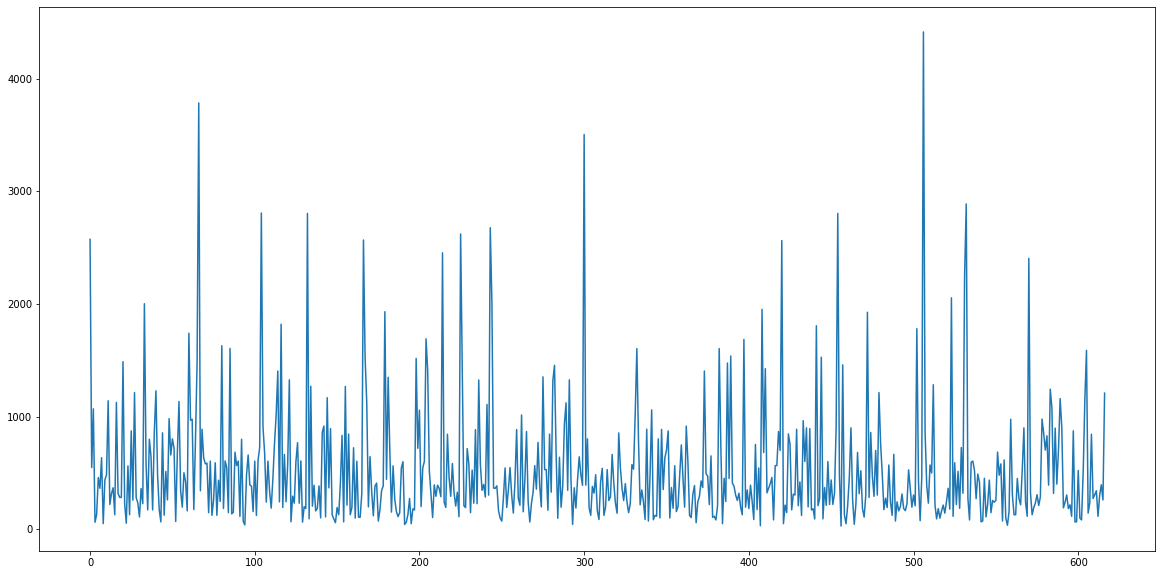

In [8]:
plt.figure(figsize=(20,10))
plt.plot(new_data['Sales'], label='Sales history')

In [9]:
X = np.asarray(cdf[['Order Date']])
X

array([['2014-01-06T00:00:00.000000000'],
       ['2014-01-13T00:00:00.000000000'],
       ['2014-01-20T00:00:00.000000000'],
       ['2014-02-11T00:00:00.000000000'],
       ['2014-02-12T00:00:00.000000000'],
       ['2014-03-01T00:00:00.000000000'],
       ['2014-03-01T00:00:00.000000000'],
       ['2014-03-01T00:00:00.000000000'],
       ['2014-03-07T00:00:00.000000000'],
       ['2014-03-07T00:00:00.000000000'],
       ['2014-03-07T00:00:00.000000000'],
       ['2014-03-14T00:00:00.000000000'],
       ['2014-03-21T00:00:00.000000000'],
       ['2014-03-22T00:00:00.000000000'],
       ['2014-03-25T00:00:00.000000000'],
       ['2014-03-30T00:00:00.000000000'],
       ['2014-03-31T00:00:00.000000000'],
       ['2014-04-18T00:00:00.000000000'],
       ['2014-04-23T00:00:00.000000000'],
       ['2014-04-23T00:00:00.000000000'],
       ['2014-04-25T00:00:00.000000000'],
       ['2014-04-26T00:00:00.000000000'],
       ['2014-04-29T00:00:00.000000000'],
       ['2014-04-29T00:00:00.00000